In [10]:
import pandas as pd

# Load metadata.csv
df = pd.read_csv('data/cleaned_metadata.csv')

# Display first few rows
df.head()


,cord_uid,title,abstract,journal,publish_time,year,abstract_word_count
0,abc001,COVID-19 and Public Health,Study of COVID-19 transmission and public heal...,Nature,2020-03-15,2020,9
1,abc002,Vaccine Development for SARS-CoV-2,The development of vaccines against SARS-CoV-2...,Science,2021-06-10,2021,11
2,abc003,Machine Learning for COVID-19 Diagnosis,Using machine learning to detect COVID-19 from...,IEEE Transactions,2020-08-20,2020,11
3,abc004,Impact of Lockdowns on Mental Health,Exploring the mental health consequences of CO...,The Lancet Psychiatry,2020-05-12,2020,10
4,abc005,Remdesivir Clinical Trials,Clinical trial results for Remdesivir treatmen...,New England Journal of Medicine,2020-07-01,2020,9


In [11]:
# Display shape and info
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

# Check missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())

# Display basic stats for numerical columns
print("\nNumerical Statistics:")
print(df.describe())


Data Shape: (10, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cord_uid             10 non-null     object
 1   title                10 non-null     object
 2   abstract             10 non-null     object
 3   journal              10 non-null     object
 4   publish_time         10 non-null     object
 5   year                 10 non-null     int64 
 6   abstract_word_count  10 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 692.0+ bytes
None

Missing Values by Column:
cord_uid               0
title                  0
abstract               0
journal                0
publish_time           0
year                   0
abstract_word_count    0
dtype: int64

Numerical Statistics:
              year  abstract_word_count
count    10.000000            10.000000
mean   2020.300000             9.100000
std     

In [12]:
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

# Create abstract word count column
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(str(x).split()))

# Check cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cord_uid             10 non-null     object        
 1   title                10 non-null     object        
 2   abstract             10 non-null     object        
 3   journal              10 non-null     object        
 4   publish_time         10 non-null     datetime64[ns]
 5   year                 10 non-null     int32         
 6   abstract_word_count  10 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 652.0+ bytes


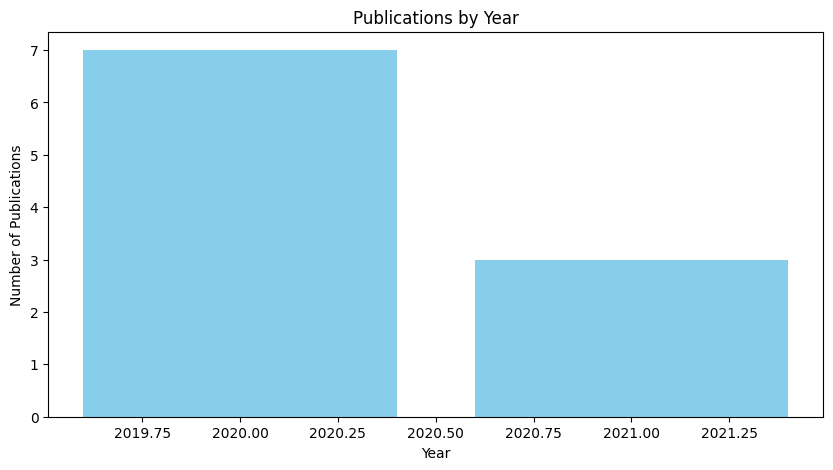

In [13]:
import matplotlib.pyplot as plt

year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Publications by Year')
plt.show()


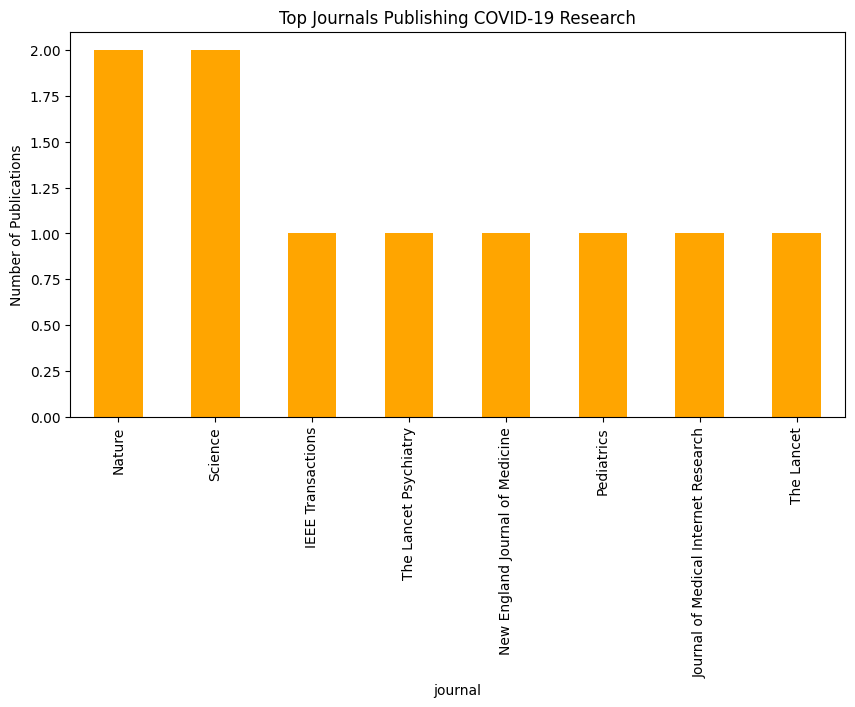

In [14]:
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_journals.plot(kind='bar', color='orange', title='Top Journals Publishing COVID-19 Research')
plt.ylabel('Number of Publications')
plt.show()


In [15]:
from collections import Counter
import re

all_titles = ' '.join(df['title'].dropna())
words = re.findall(r'\w+', all_titles.lower())
word_freq = Counter(words).most_common(20)
print("Top 20 Words in Titles:")
print(word_freq)


Top 20 Words in Titles:
[('covid', 5), ('19', 5), ('and', 2), ('health', 2), ('for', 2), ('sars', 2), ('cov', 2), ('2', 2), ('of', 2), ('public', 1), ('vaccine', 1), ('development', 1), ('machine', 1), ('learning', 1), ('diagnosis', 1), ('impact', 1), ('lockdowns', 1), ('on', 1), ('mental', 1), ('remdesivir', 1)]


In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()


In [17]:
# Key insights:
# - Total papers: df.shape[0]
# - Top journals: top_journals
# - Publication trends: year_counts
# - Most common words: word_freq
#
# Challenges:
# - Handling missing data
# - Large dataset can be slow to process
# - Abstract text cleaning
